In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score, roc_auc_score, roc_curve


In [2]:
#Load the dataset 
data=pd.read_csv("gender.csv")

In [3]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
data.shape

(5001, 8)

In [6]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

In [7]:
data['gender']

0       0
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: int64

In [8]:
X = data.drop('gender', axis=1)
y = data['gender']

In [9]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [10]:
y

0       0
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
4677,1,15.4,6.6,0,1,1,1
800,1,12.2,5.2,0,0,0,0
3671,0,11.5,5.8,0,0,0,0
4193,1,12.7,5.1,0,0,0,0
2968,1,15.1,5.6,1,1,1,1
...,...,...,...,...,...,...,...
4426,1,13.0,6.5,0,0,0,0
466,1,13.1,5.5,0,0,0,0
3092,1,12.0,5.9,0,0,0,0
3772,1,12.8,5.4,0,0,0,0


In [13]:
X_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
1501,1,13.2,5.7,1,1,1,1
2586,1,13.7,6.0,0,0,0,0
2653,0,12.9,5.3,0,0,0,1
1055,1,13.2,5.9,1,1,1,1
705,0,15.2,5.6,1,1,1,1
...,...,...,...,...,...,...,...
2313,1,13.5,5.8,0,0,0,0
3214,1,12.6,5.5,1,1,1,1
2732,1,14.3,5.7,0,0,0,0
1926,1,13.9,6.3,1,1,1,1


In [14]:
y_train

4677    0
800     1
3671    1
4193    1
2968    0
       ..
4426    1
466     1
3092    1
3772    1
860     1
Name: gender, Length: 4000, dtype: int64

In [15]:
y_test

1501    0
2586    1
2653    1
1055    0
705     0
       ..
2313    1
3214    0
2732    1
1926    0
4227    1
Name: gender, Length: 1001, dtype: int64

In [16]:
print(f"Training set length of X: {len(X_train)}")
print(f"Testing set lengthof X: {len(X_test)}")

Training set length of X: 4000
Testing set lengthof X: 1001


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
X_train

array([[ 0.38484494,  1.99684971,  1.2022527 , ...,  0.98708341,
         1.01867434,  0.9965061 ],
       [ 0.38484494, -0.8848672 , -1.38383285, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [-2.59844915, -1.51524277, -0.27551047, ..., -1.01308561,
        -0.981668  , -1.00350615],
       ...,
       [ 0.38484494, -1.06497451, -0.09079008, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [ 0.38484494, -0.34454528, -1.01439206, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [ 0.38484494, -1.60529643, -0.82967166, ..., -1.01308561,
        -0.981668  , -1.00350615]])

In [19]:
X_test

array([[ 0.38484494,  0.01566934, -0.46023087, ...,  0.98708341,
         1.01867434,  0.9965061 ],
       [ 0.38484494,  0.4659376 ,  0.09393032, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [-2.59844915, -0.25449162, -1.19911246, ..., -1.01308561,
        -0.981668  ,  0.9965061 ],
       ...,
       [ 0.38484494,  1.00625952, -0.46023087, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [ 0.38484494,  0.64604491,  0.64809151, ...,  0.98708341,
         1.01867434,  0.9965061 ],
       [ 0.38484494, -0.16443797, -1.01439206, ...,  0.98708341,
        -0.981668  ,  0.9965061 ]])

In [20]:
# Print the first five rows of the scaled features
print("Scaled Features (First 5 rows):\n", X_train[:5])

Scaled Features (First 5 rows):
 [[ 0.38484494  1.99684971  1.2022527  -0.98807114  0.98708341  1.01867434
   0.9965061 ]
 [ 0.38484494 -0.8848672  -1.38383285 -0.98807114 -1.01308561 -0.981668
  -1.00350615]
 [-2.59844915 -1.51524277 -0.27551047 -0.98807114 -1.01308561 -0.981668
  -1.00350615]
 [ 0.38484494 -0.43459893 -1.56855325 -0.98807114 -1.01308561 -0.981668
  -1.00350615]
 [ 0.38484494  1.72668875 -0.64495127  1.01207287  0.98708341  1.01867434
   0.9965061 ]]


In [21]:
dt_classifier = DecisionTreeClassifier()

In [22]:
# Hyperparameter Optimization using GridSearchCV
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10],'min_samples_leaf':[1,2,4]}
dt_grid = GridSearchCV(dt_classifier, dt_params, cv=5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [23]:
# Print the best parameters and corresponding cross-validation accuracy
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Decision Tree Cross-Validation Accuracy:", dt_grid.best_score_)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Cross-Validation Accuracy: 0.9710000000000001


In [24]:
# Train the Decision Tree model
best_dt_model = dt_grid.best_estimator_
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [25]:
# Make predictions on the testing set
dt_predictions = best_dt_model.predict(X_test)
dt_predictions 

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [26]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_accuracy

0.961038961038961

In [27]:
dt_precision = precision_score(y_test, dt_predictions)
dt_precision

0.9639278557114228

In [28]:
dt_recall = recall_score(y_test, dt_predictions)
dt_recall

0.9581673306772909

In [29]:
dt_f1_score = f1_score(y_test, dt_predictions)
dt_f1_score 

0.961038961038961

In [30]:
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_conf_matrix

array([[481,  18],
       [ 21, 481]], dtype=int64)

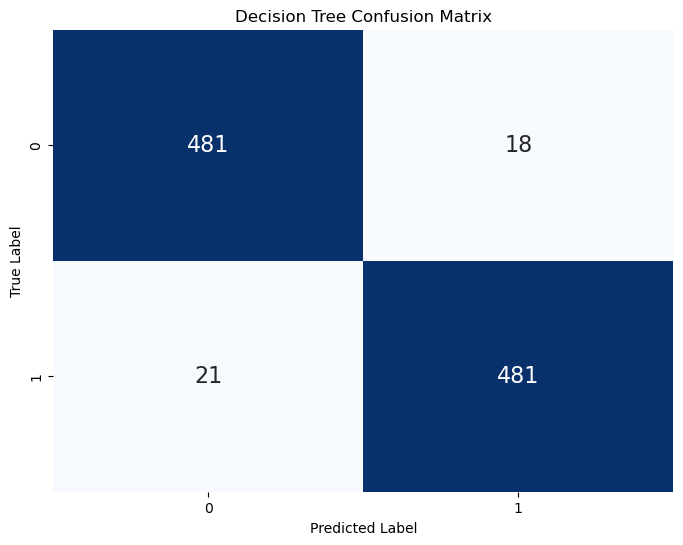

In [31]:
# Visualize confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [32]:
dt_roc_auc = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
dt_roc_auc

0.9775307587286126

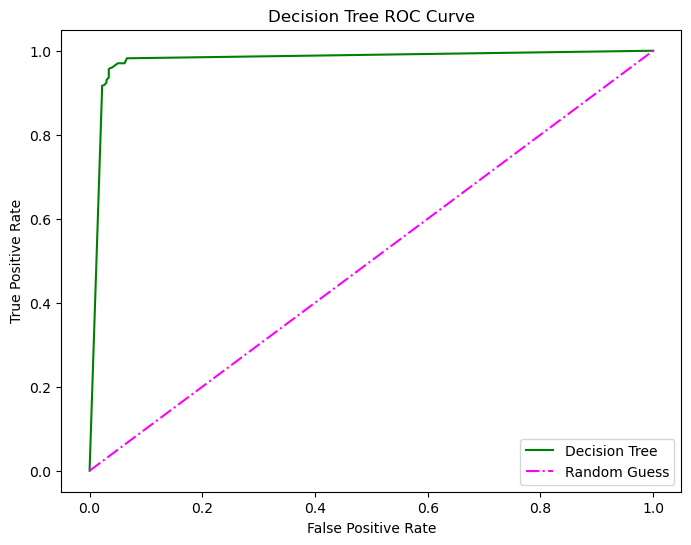

In [33]:
# Visualization: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree',color="green")
plt.plot([0, 1], [0, 1], linestyle='-.', color='magenta', label='Random Guess')
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [34]:
rf_classifier = RandomForestClassifier()

In [35]:
# Hyperparameter Optimization using GridSearchCV
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10],'min_samples_leaf':[1,2,4]}
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=5,scoring="accuracy")
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [36]:
# Print the best parameters and corresponding cross-validation accuracy
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Random Forest Cross-Validation Accuracy:", rf_grid.best_score_)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Random Forest Cross-Validation Accuracy: 0.9772500000000001


In [37]:
# Train the Random Forest model
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=150)

In [38]:
# Make predictions on the testing set
rf_predictions = best_rf_model.predict(X_test)

In [39]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy

0.9660339660339661

In [40]:
rf_precision = precision_score(y_test, rf_predictions)
rf_precision

0.95703125

In [41]:
rf_recall = recall_score(y_test, rf_predictions)
rf_recall

0.9760956175298805

In [42]:
rf_f1_score = f1_score(y_test, rf_predictions)
rf_f1_score 

0.9664694280078896

In [43]:
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_conf_matrix 

array([[477,  22],
       [ 12, 490]], dtype=int64)

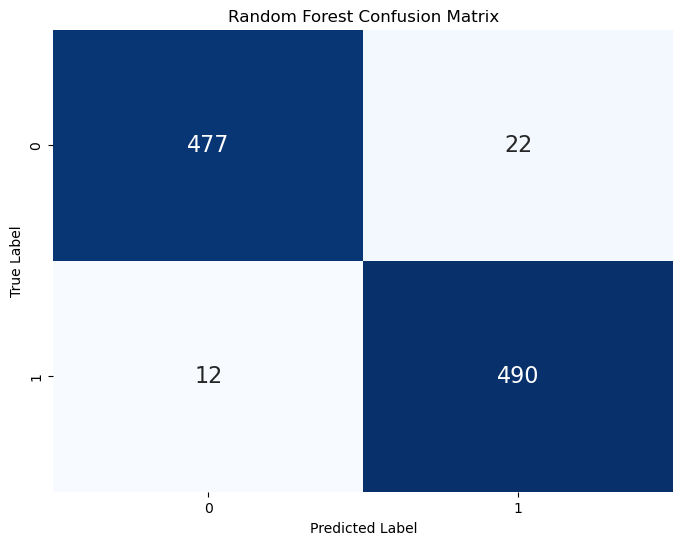

In [44]:
# Visualize confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
rf_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
rf_roc_auc 

0.9956167314709099

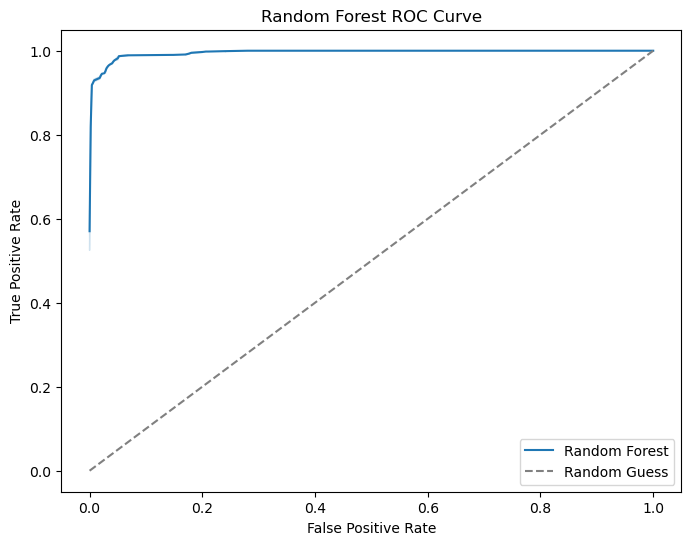

In [46]:
# Visualization: ROC Curve using Seaborn
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_rf, y=tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [47]:
# Compare the performance of Decision Tree and Random Forest models
print("\nDecision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1_score:.4f}")
print(f"AUC-ROC Score: {dt_roc_auc:.4f}")
print("Confusion Matrix:\n", dt_conf_matrix)

print("\nRandom Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1_score:.4f}")
print(f"AUC-ROC Score: {rf_roc_auc:.4f}")
print("Confusion Matrix:\n", rf_conf_matrix)



Decision Tree Performance:
Accuracy: 0.9610
Precision: 0.9639
Recall: 0.9582
F1 Score: 0.9610
AUC-ROC Score: 0.9775
Confusion Matrix:
 [[481  18]
 [ 21 481]]

Random Forest Performance:
Accuracy: 0.9660
Precision: 0.9570
Recall: 0.9761
F1 Score: 0.9665
AUC-ROC Score: 0.9956
Confusion Matrix:
 [[477  22]
 [ 12 490]]


In [48]:
# Provide insights into the advantages and disadvantages of each model
print("\nAdvantages and Disadvantages:")
print("Decision Tree:")
print("Advantages: Simple, interpretable, requires less data preprocessing.")
print("Disadvantages: Prone to overfitting, may not generalize well.")

print("\nRandom Forest:")
print("Advantages: Handles overfitting by combining multiple trees, often provides better generalization.")
print("Disadvantages: Complexity, harder to interpret compared to a single decision tree.")



Advantages and Disadvantages:
Decision Tree:
Advantages: Simple, interpretable, requires less data preprocessing.
Disadvantages: Prone to overfitting, may not generalize well.

Random Forest:
Advantages: Handles overfitting by combining multiple trees, often provides better generalization.
Disadvantages: Complexity, harder to interpret compared to a single decision tree.
